# Deep Learning com TensorFlow e Keras

## Pacotes

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Carregando os Dados

In [2]:
# Carregando os dados
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Classes das imagens
nomes_classes = ['airplane', 'automabile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Pré-Processamento e Visualização das Imagens

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino/255.0
imagens_teste = imagens_teste/255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
  plt.figure(figsize = (10,10))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap = plt.cm.binary)
    plt.xlabel(nomes_classes[labels[i][0]])
  plt.show()

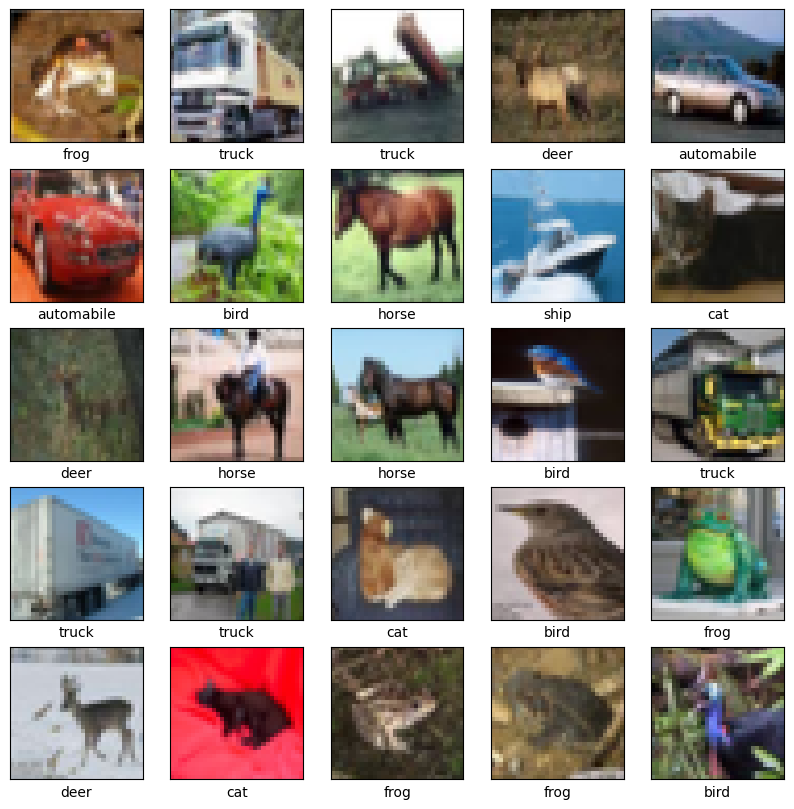

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

## Transtrução do Modelo

In [7]:
# Modelo

# Cria o objeto de seguência de camadas
modelo = models.Sequential()

# Adicona o primro bloco de convolução e max pooling (camada de entrada)
modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adiconar camadas de classificação
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation = 'relu'))
modelo.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# # Sumario do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [10]:
# Compilação do modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [11]:
%%time
history = modelo.fit(imagens_treino,
                     labels_treino,
                     epochs = 10,
                     validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.6074 - accuracy: 0.4063 - val_loss: 1.3268 - val_accuracy: 0.5215
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2428 - accuracy: 0.5563 - val_loss: 1.1601 - val_accuracy: 0.5889
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.0941 - accuracy: 0.6133 - val_loss: 1.1154 - val_accuracy: 0.6063
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9957 - accuracy: 0.6501 - val_loss: 1.0243 - val_accuracy: 0.6349
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9261 - accuracy: 0.6766 - val_loss: 0.9848 - val_accuracy: 0.6537
Epoch 6/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8597 - accuracy: 0.6992 - val_loss: 1.0844 - val_accuracy: 0.6296
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8143 - accuracy: 0.7147 - val_loss: 0.9022 -

## Avaliação do Modelo

In [12]:
# Avaliar o modelo
erro_teste, acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 3s - loss: 0.9789 - accuracy: 0.6700 - 3s/epoch - 11ms/step


In [14]:
print('Acurácia com Dados de Teste: {:.2f}'.format(acc_teste))

Acurácia com Dados de Teste: 0.67


## Deploy do Modelo

In [15]:
# prompt: faça uma conexão com google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [26]:
# Carregando uma imagem
nova_imagem = Image.open('/content/drive/MyDrive/2-Estudos/2-Qualificação Profissional/2-Cursos em Andamento com certificado/Python Para Análise de Dados e Data Science/Cap17 - Deep Learning/1-Cap17/dados/nova_imagem.jpg')

In [27]:
# Dimensões da imagem em pixels
nova_imagem.size

(1919, 1199)

In [28]:
# Redimensionando para 32x32
nova_imagem = nova_imagem.resize((32, 32))

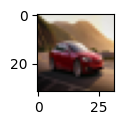

In [29]:
# Visualisando a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)

In [30]:
# Convertendo a imagem para array NumPy e normalizando
nova_imagem_array = np.array(nova_imagem)/255.0

In [32]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [33]:
# Previsões
previsoes = modelo.predict(nova_imagem_array)

1/1 [==============================] - 0s 383ms/step


In [34]:
print(previsoes)

[[2.5905075e-04 9.9893361e-01 1.5096748e-07 2.0095970e-06 7.5300113e-09
  9.0593363e-07 9.3153030e-05 2.8676834e-07 3.7900108e-04 3.3176859e-04]]


In [35]:
# Obtém a  classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [36]:
print('A nova imagem foi classificada como: {}'.format(nome_classe_prevista))

A nova imagem foi classificada como: automabile
